Detected face locations: [(39, 210, 168, 81)]
Resized image containing faces with hair saved as cropped_face_with_hair_224x224.jpg


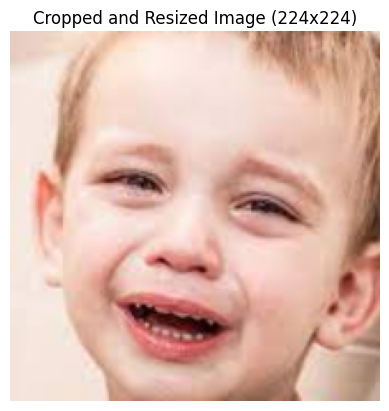

In [1]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
import os

# Load the image
image_path = "tc3.jpg"
image = cv2.imread(image_path)

# Convert the image to .jpg format if it is not already in that format
if not image_path.lower().endswith(".jpg"):
    jpg_image_path = os.path.splitext(image_path)[0] + ".jpg"
    cv2.imwrite(jpg_image_path, image)
    image = cv2.imread(jpg_image_path)
    print(f"Converted image to {jpg_image_path}")

# Detect face locations
face_locations = face_recognition.face_locations(image)

# Log the detected face locations
print(f"Detected face locations: {face_locations}")

if len(face_locations) > 0:
    # Find the bounding box that includes all detected faces
    top = min(face[0] for face in face_locations)  # Minimum top value
    right = max(face[1] for face in face_locations)  # Maximum right value
    bottom = max(face[2] for face in face_locations)  # Maximum bottom value
    left = min(face[3] for face in face_locations)  # Minimum left value

    # Add padding to the top for hair and sides for balance
    padding = int((bottom - top) * 0.25)  # 25% of face height as padding
    top = max(0, top - padding)  # Include hair
    left = max(0, left - padding // 2)  # Slight padding to the left
    right = min(image.shape[1], right + padding // 2)  # Slight padding to the right

    # Crop the region that includes faces with hair
    cropped_image = image[top:bottom, left:right]

    # Resize the cropped image to 224x224 pixels
    resized_image = cv2.resize(cropped_image, (224, 224))

    # Save the resized image
    output_path = "cropped_face_with_hair_224x224.jpg"
    cv2.imwrite(output_path, resized_image)
    print(f"Resized image containing faces with hair saved as {output_path}")

    # Convert BGR to RGB for display
    resized_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(resized_rgb)
    plt.axis("off")
    plt.title("Cropped and Resized Image (224x224)")
    plt.show()

else:
    print("No faces detected in the image.")
